# Working With Dates in Pandas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Datetime Types

In [2]:
pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [3]:
# pd.to_datetime('Jan:1:1970')

In [4]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In [5]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [6]:
pd.to_datetime(df.date)

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [7]:
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## `.dt` accessor

In [8]:
df.date.dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4         Monday
         ...    
256    Wednesday
257     Thursday
258       Friday
259       Monday
260      Tuesday
Name: date, Length: 261, dtype: object

In [9]:
df.date.dt.month

0       1
1       1
2       1
3       1
4       1
       ..
256    12
257    12
258    12
259    12
260    12
Name: date, Length: 261, dtype: int64

In [10]:
df.date.dt.quarter

0      1
1      1
2      1
3      1
4      1
      ..
256    4
257    4
258    4
259    4
260    4
Name: date, Length: 261, dtype: int64

In [11]:
df.date.dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
256    2019
257    2019
258    2019
259    2019
260    2019
Name: date, Length: 261, dtype: int64

In [12]:
df.date.dt.weekday.value_counts(), \
df.date.dt.month.value_counts().sort_index()

(1    53
 4    52
 3    52
 2    52
 0    52
 Name: date, dtype: int64,
 1     23
 2     20
 3     21
 4     22
 5     23
 6     20
 7     23
 8     22
 9     21
 10    23
 11    21
 12    22
 Name: date, dtype: int64)

In [13]:
df['month'] = df.date.dt.month

df.month.value_counts().sort_index()

1     23
2     20
3     21
4     22
5     23
6     20
7     23
8     22
9     21
10    23
11    21
12    22
Name: month, dtype: int64

How many observations are there for each month? Each weekday?

In [14]:
df['weekday'] = df.date.dt.day_name()

df.weekday.value_counts()

Tuesday      53
Monday       52
Thursday     52
Wednesday    52
Friday       52
Name: weekday, dtype: int64

In [15]:
pd.__version__

'1.0.5'

## DateTime Indexes

In [16]:
df = df.set_index('date').sort_index()
df

,coffee_consumption,month,weekday
date,,,
2019-01-01,14.301915,1,Tuesday
2019-01-02,12.905900,1,Wednesday
2019-01-03,10.046015,1,Thursday
2019-01-04,6.354805,1,Friday
2019-01-07,8.545563,1,Monday
...,...,...,...
2019-12-25,12.250875,12,Wednesday
2019-12-26,7.513206,12,Thursday
2019-12-27,9.464345,12,Friday


In [17]:
# earliest + latest dates
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [18]:
# Month of March
df.loc['2019-03']

,coffee_consumption,month,weekday
date,,,
2019-03-01,9.109061,3,Friday
2019-03-04,9.054681,3,Monday
2019-03-05,9.915438,3,Tuesday
2019-03-06,11.254156,3,Wednesday
2019-03-07,5.680393,3,Thursday
2019-03-08,8.823756,3,Friday
2019-03-11,11.296137,3,Monday
2019-03-12,6.552509,3,Tuesday
2019-03-13,10.784550,3,Wednesday


In [19]:
df.loc['2019-03':'2019-04']

,coffee_consumption,month,weekday
date,,,
2019-03-01,9.109061,3,Friday
2019-03-04,9.054681,3,Monday
2019-03-05,9.915438,3,Tuesday
2019-03-06,11.254156,3,Wednesday
2019-03-07,5.680393,3,Thursday
2019-03-08,8.823756,3,Friday
2019-03-11,11.296137,3,Monday
2019-03-12,6.552509,3,Tuesday
2019-03-13,10.784550,3,Wednesday


In [20]:
df.loc['2019-03-01']

coffee_consumption    9.10906
month                       3
weekday                Friday
Name: 2019-03-01 00:00:00, dtype: object

In [21]:
# Subset of march

### Resampling

Upsampling: (generally) increase number of rows + introduce nulls

In [22]:
# includes weekends as NaN
by_day = df.asfreq('D')
by_day.head(15)

,coffee_consumption,month,weekday
date,,,
2019-01-01,14.301915,1.0,Tuesday
2019-01-02,12.905900,1.0,Wednesday
2019-01-03,10.046015,1.0,Thursday
2019-01-04,6.354805,1.0,Friday
2019-01-05,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN
2019-01-07,8.545563,1.0,Monday
2019-01-08,9.410101,1.0,Tuesday
2019-01-09,7.219271,1.0,Wednesday


In [23]:
# ffill: uses value before null as a fill method
# bfill: uses value after null as a fill method
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,month,weekday,ffill,bfill
date,,,,,
2019-01-01,14.301915,1.0,Tuesday,14.301915,14.301915
2019-01-02,12.905900,1.0,Wednesday,12.905900,12.905900
2019-01-03,10.046015,1.0,Thursday,10.046015,10.046015
2019-01-04,6.354805,1.0,Friday,6.354805,6.354805
2019-01-05,NaN,NaN,NaN,6.354805,8.545563
2019-01-06,NaN,NaN,NaN,6.354805,8.545563
2019-01-07,8.545563,1.0,Monday,8.545563,8.545563
2019-01-08,9.410101,1.0,Tuesday,9.410101,9.410101
2019-01-09,7.219271,1.0,Wednesday,7.219271,7.219271


In [24]:
df = df.fillna(0)

Downsampling: reduce number of rows and aggregate

Like groupby -- but time is the category

In [26]:
df.head(10)

,coffee_consumption,month,weekday
date,,,
2019-01-01,14.301915,1,Tuesday
2019-01-02,12.905900,1,Wednesday
2019-01-03,10.046015,1,Thursday
2019-01-04,6.354805,1,Friday
2019-01-07,8.545563,1,Monday
2019-01-08,9.410101,1,Tuesday
2019-01-09,7.219271,1,Wednesday
2019-01-10,9.338456,1,Thursday
2019-01-11,11.872667,1,Friday


In [29]:
del df['month']

In [27]:
#
df.resample('W').sum()

,coffee_consumption,month
date,,
2019-01-06,43.608635,4
2019-01-13,46.386058,5
2019-01-20,51.325487,5
2019-01-27,48.451299,5
2019-02-03,53.197542,6
2019-02-10,55.977424,10
2019-02-17,53.654554,10
2019-02-24,49.042144,10
2019-03-03,47.431519,11


In [32]:
idx = pd.date_range('20210901', freq='D', periods=4)
pd.DataFrame({'x': [1,2,3,4]}, index=idx)

,x
2021-09-01,1
2021-09-02,2
2021-09-03,3
2021-09-04,4


In [33]:
pd.DataFrame({'x': [1,2,3,4]}, index=idx).resample('3d').mean()

,x
2021-09-01,2
2021-09-04,4


In [34]:
df.resample('3W').mean()

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,9.744190
2019-02-17,10.855301
2019-03-10,9.413472
2019-03-31,11.062768
2019-04-21,10.222518
2019-05-12,10.092044
2019-06-02,11.052819
2019-06-23,9.592148


In [35]:
df.resample('M').sum()

,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
2019-06-30,183.656493
2019-07-31,248.267463
2019-08-31,224.007066
2019-09-30,215.689004


In [38]:
df.resample('Y').sum()

,coffee_consumption
date,
2019-12-31,2692.535209


In [42]:
# Hourly
idx = pd.date_range('now', freq='H', periods=8)
example_df = pd.DataFrame({'x': np.random.rand(8)}, index=idx)

In [43]:
example_df.resample('H').mean()

,x
2021-10-01 11:00:00,0.611117
2021-10-01 12:00:00,0.988212
2021-10-01 13:00:00,0.518602
2021-10-01 14:00:00,0.888639
2021-10-01 15:00:00,0.960486
2021-10-01 16:00:00,0.470674
2021-10-01 17:00:00,0.249842
2021-10-01 18:00:00,0.140304


### Rolling Windows

In [46]:
df = df.asfreq('D').fillna(0)

In [48]:
df['weekly_avg'] = df.resample('W').transform(lambda x: x/len)

In [50]:
df.head()

,coffee_consumption,weekday,weekly_avg
date,,,
2019-01-01,14.301915,Tuesday,7.268106
2019-01-02,12.905900,Wednesday,7.268106
2019-01-03,10.046015,Thursday,7.268106
2019-01-04,6.354805,Friday,7.268106
2019-01-05,0.000000,0,7.268106


In [55]:
# avg of previous 7 values
df['rolling_weekly_avg'] = df.coffee_consumption.rolling(7).mean()

In [64]:
# with a datetime index, 
    # df.column.dt.###### = df.index.######
    # i.e. to extract components from a date, use, e.g. .dt.day_name() if there is a column...
df.weekday = df.index.day_name()

In [65]:
df.head(15)

,coffee_consumption,weekday,weekly_avg,rolling_weekly_avg
date,,,,
2019-01-01,14.301915,Tuesday,7.268106,NaN
2019-01-02,12.905900,Wednesday,7.268106,NaN
2019-01-03,10.046015,Thursday,7.268106,NaN
2019-01-04,6.354805,Friday,7.268106,NaN
2019-01-05,0.000000,Saturday,7.268106,NaN
2019-01-06,0.000000,Sunday,7.268106,NaN
2019-01-07,8.545563,Monday,6.626580,7.450600
2019-01-08,9.410101,Tuesday,6.626580,6.751769
2019-01-09,7.219271,Wednesday,6.626580,5.939394


In [61]:
# 3 day moving average
df.coffee_consumption.rolling(3).mean()

date
2019-01-01          NaN
2019-01-02          NaN
2019-01-03    12.417943
2019-01-04     9.768907
2019-01-05     5.466940
                ...    
2019-12-27     9.742809
2019-12-28     5.659184
2019-12-29     3.154782
2019-12-30     4.874369
2019-12-31     8.263807
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

In [62]:
# Moving monthly sum
df.coffee_consumption.rolling(30).sum()

date
2019-01-01           NaN
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-05           NaN
                 ...    
2019-12-27    228.429861
2019-12-28    219.936402
2019-12-29    205.195104
2019-12-30    219.818211
2019-12-31    229.986526
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

In [63]:
df.head(30)

,coffee_consumption,weekday,weekly_avg,rolling_weekly_avg
date,,,,
2019-01-01,14.301915,Tuesday,7.268106,NaN
2019-01-02,12.905900,Wednesday,7.268106,NaN
2019-01-03,10.046015,Thursday,7.268106,NaN
2019-01-04,6.354805,Friday,7.268106,NaN
2019-01-05,0.000000,0,7.268106,NaN
2019-01-06,0.000000,0,7.268106,NaN
2019-01-07,8.545563,Monday,6.626580,7.450600
2019-01-08,9.410101,Tuesday,6.626580,6.751769
2019-01-09,7.219271,Wednesday,6.626580,5.939394


### Lagging and Lead

In [66]:
pd.concat([
    df.coffee_consumption,
    df.coffee_consumption.diff(), # shows difference between day and previous day
    df.coffee_consumption.shift(), # show previous days value
], axis=1)

,coffee_consumption,coffee_consumption,coffee_consumption
date,,,
2019-01-01,14.301915,NaN,NaN
2019-01-02,12.905900,-1.396015,14.301915
2019-01-03,10.046015,-2.859885,12.905900
2019-01-04,6.354805,-3.691210,10.046015
2019-01-05,0.000000,-6.354805,6.354805
...,...,...,...
2019-12-27,9.464345,1.951140,7.513206
2019-12-28,0.000000,-9.464345,9.464345
2019-12-29,0.000000,0.000000,0.000000


In [67]:
# different time periods
df['coffee_cons_tomorrow'] = df.coffee_consumption.shift(-1)

In [68]:
df.head()

,coffee_consumption,weekday,weekly_avg,rolling_weekly_avg,coffee_cons_tomorrow
date,,,,,
2019-01-01,14.301915,Tuesday,7.268106,NaN,12.905900
2019-01-02,12.905900,Wednesday,7.268106,NaN,10.046015
2019-01-03,10.046015,Thursday,7.268106,NaN,6.354805
2019-01-04,6.354805,Friday,7.268106,NaN,0.000000
2019-01-05,0.000000,Saturday,7.268106,NaN,0.000000


## Strftime

In [69]:
# gives mini language that allows formating of dates
df.index.strftime('%B %d, %Y')[:4]

Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

In [71]:
df.index.strftime('%d-%m-%Y')[:4]

Index(['01-01-2019', '02-01-2019', '03-01-2019', '04-01-2019'], dtype='object', name='date')

In [72]:
df.index.strftime('%m-%d-%Y')[:4]

Index(['01-01-2019', '01-02-2019', '01-03-2019', '01-04-2019'], dtype='object', name='date')

## Timezones

In [76]:
np.random.seed(13)

idx = pd.date_range('now', freq='H', periods=100)
hourly_df = pd.DataFrame({'x': np.random.choice(list('abc'), 100), 'y': np.random.rand(100)}, index=idx)

In [77]:
hourly_df

,x,y
2021-10-01 11:30:16.866662,c,0.792424
2021-10-01 12:30:16.866662,a,0.012453
2021-10-01 13:30:16.866662,c,0.747946
2021-10-01 14:30:16.866662,a,0.990472
2021-10-01 15:30:16.866662,c,0.189689
...,...,...
2021-10-05 10:30:16.866662,c,0.639644
2021-10-05 11:30:16.866662,a,0.284556
2021-10-05 12:30:16.866662,c,0.914614
2021-10-05 13:30:16.866662,b,0.174527


In [78]:
# tx = timezone
hourly_df.index.tz

In [79]:
hourly_df.index.tz is None

True

In [81]:
hourly_df.tz_localize('America/Chicago')
hourly_df.head(4)

,x,y
2021-10-01 11:30:16.866662,c,0.792424
2021-10-01 12:30:16.866662,a,0.012453
2021-10-01 13:30:16.866662,c,0.747946
2021-10-01 14:30:16.866662,a,0.990472


In [82]:
hourly_df.tz_localize(None)

,x,y
2021-10-01 11:30:16.866662,c,0.792424
2021-10-01 12:30:16.866662,a,0.012453
2021-10-01 13:30:16.866662,c,0.747946
2021-10-01 14:30:16.866662,a,0.990472
2021-10-01 15:30:16.866662,c,0.189689
...,...,...
2021-10-05 10:30:16.866662,c,0.639644
2021-10-05 11:30:16.866662,a,0.284556
2021-10-05 12:30:16.866662,c,0.914614
2021-10-05 13:30:16.866662,b,0.174527


In [83]:
hourly_df = hourly_df.tz_localize('America/New_York')
hourly_df

,x,y
2021-10-01 11:30:16.866662-04:00,c,0.792424
2021-10-01 12:30:16.866662-04:00,a,0.012453
2021-10-01 13:30:16.866662-04:00,c,0.747946
2021-10-01 14:30:16.866662-04:00,a,0.990472
2021-10-01 15:30:16.866662-04:00,c,0.189689
...,...,...
2021-10-05 10:30:16.866662-04:00,c,0.639644
2021-10-05 11:30:16.866662-04:00,a,0.284556
2021-10-05 12:30:16.866662-04:00,c,0.914614
2021-10-05 13:30:16.866662-04:00,b,0.174527


In [85]:
hourly_df.tz_convert('America/Los_Angeles')
hourly_df.head(4)

,x,y
2021-10-01 11:30:16.866662-04:00,c,0.792424
2021-10-01 12:30:16.866662-04:00,a,0.012453
2021-10-01 13:30:16.866662-04:00,c,0.747946
2021-10-01 14:30:16.866662-04:00,a,0.990472


[Wikipedia: List of Time Zones](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones)

## Timedeltas

In [86]:
start_date = pd.to_datetime('20210614')
today = pd.to_datetime('20211001')
graduation_date = pd.to_datetime('20211207')

In [91]:
days_since_start = (today-start_date) / pd.Timedelta('1d')

In [92]:
today-start_date

Timedelta('108 days 00:00:00')

In [93]:
total_days = (graduation_date-start_date) / pd.Timedelta('1d')

In [95]:
days_since_start / total_days

0.6136363636363636

In [99]:
df['days_since_end'] = (df.index.max() - df.index) / pd.Timedelta('1d')

In [101]:
df.head()

,coffee_consumption,weekday,weekly_avg,rolling_weekly_avg,coffee_cons_tomorrow,days_since_end
date,,,,,,
2019-01-01,14.301915,Tuesday,7.268106,NaN,12.905900,364.0
2019-01-02,12.905900,Wednesday,7.268106,NaN,10.046015,363.0
2019-01-03,10.046015,Thursday,7.268106,NaN,6.354805,362.0
2019-01-04,6.354805,Friday,7.268106,NaN,0.000000,361.0
2019-01-05,0.000000,Saturday,7.268106,NaN,0.000000,360.0


In [102]:
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

,coffee_consumption,weekday,weekly_avg,rolling_weekly_avg,coffee_cons_tomorrow,days_since_end,days_since_max
date,,,,,,,
2019-12-22,0.000000,Sunday,7.020324,7.020324,9.162464,9.0,9
2019-12-23,9.162464,Monday,6.966184,6.595658,10.372400,8.0,8
2019-12-24,10.372400,Tuesday,6.966184,6.408350,12.250875,7.0,7
2019-12-25,12.250875,Wednesday,6.966184,6.864358,7.513206,6.0,6
2019-12-26,7.513206,Thursday,6.966184,6.929627,9.464345,5.0,5
2019-12-27,9.464345,Friday,6.966184,6.966184,0.000000,4.0,4
2019-12-28,0.000000,Saturday,6.966184,6.966184,0.000000,3.0,3
2019-12-29,0.000000,Sunday,6.966184,6.966184,14.623106,2.0,2
2019-12-30,14.623106,Monday,12.395711,7.746276,10.168315,1.0,1


## Plotting

<AxesSubplot:xlabel='date'>

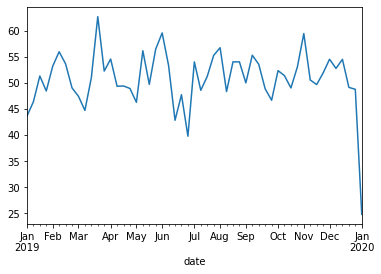

In [104]:
df.resample('W').sum().coffee_consumption.plot()

<AxesSubplot:xlabel='date'>

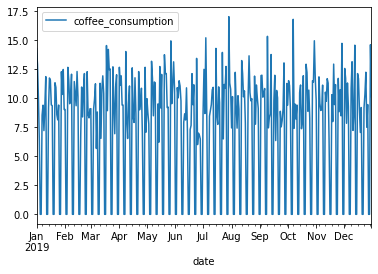

In [103]:
df[['coffee_consumption']].plot()

<AxesSubplot:xlabel='date'>

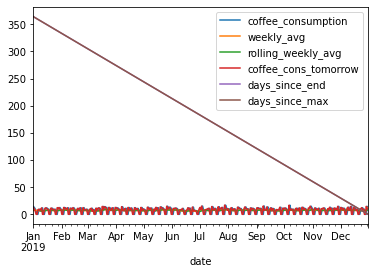

In [105]:
df.plot()

<AxesSubplot:xlabel='date'>

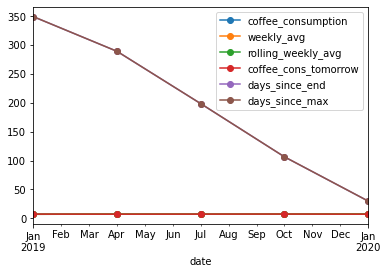

In [106]:
df.resample('3M').mean().plot(marker='o')